In [1]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os

In [2]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [3]:
from wordcloud import WordCloud

In [4]:
data=pd.read_csv("C:/Users/Tara/Downloads/youtubers_df.csv")
data

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
...,...,...,...,...,...,...,...,...,...
995,996,hamzymukbang,NaN,11700000.0,Estados Unidos,397400.0,14000.0,124.0,http://youtube.com/channel/UCPKNKldggioffXPkSm...
996,997,Adaahqueen,NaN,11700000.0,India,1100000.0,92500.0,164.0,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...
998,999,PenMultiplex,NaN,11700000.0,India,14000.0,81.0,1.0,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...


In [5]:
data.head(5)

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [6]:
data.columns

Index(['Rank', 'Username', 'Categories', 'Suscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')

In [7]:
#checking for missing values
data.isnull().sum()

Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64

Text(0.5, 1.0, 'top 10 categories')

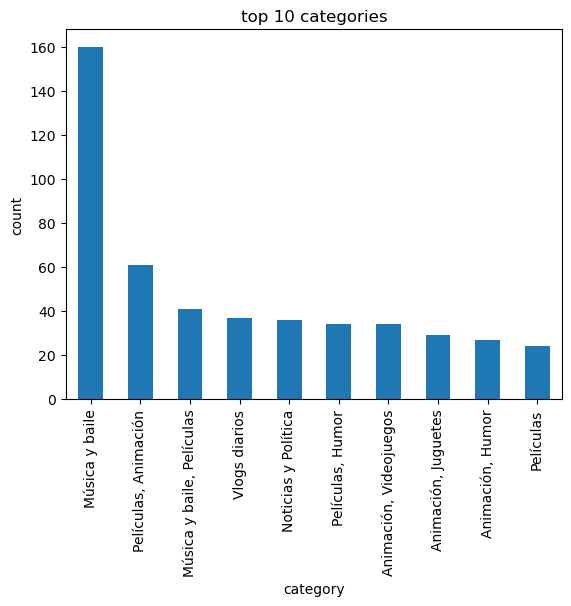

In [8]:
#trend analysis
top_ten=data["Categories"].value_counts().head(10)
top_ten.plot(kind="bar")
plt.xlabel("category")
plt.ylabel("count")
plt.title("top 10 categories")

TypeError: 'str' object is not callable

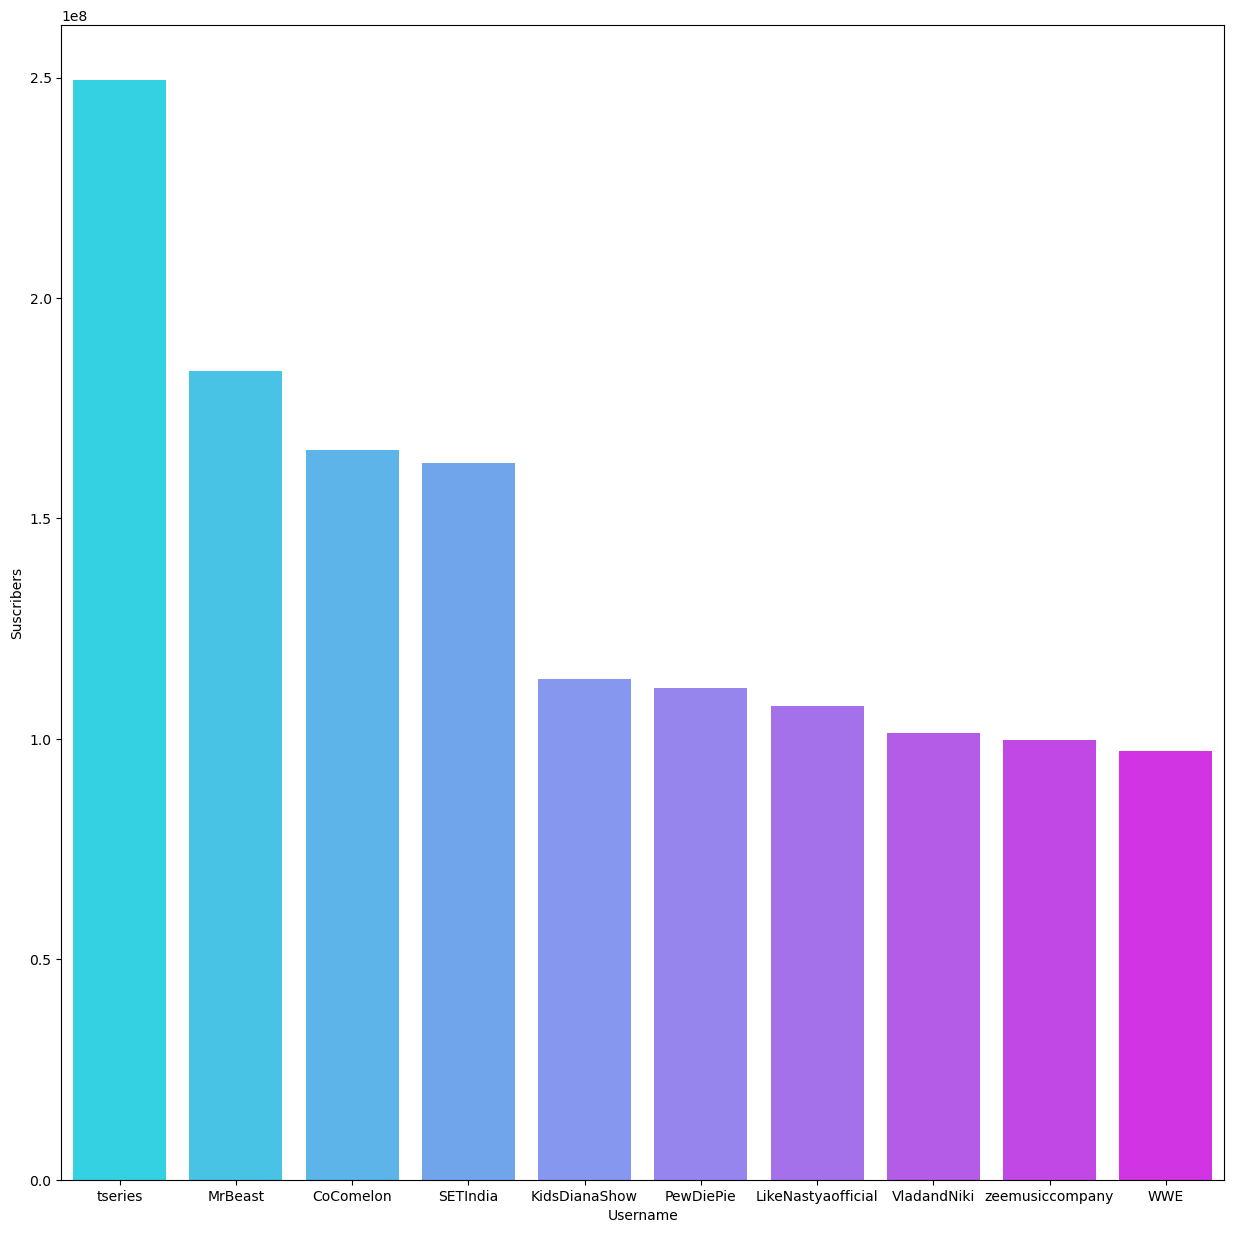

In [15]:
plt.figure(figsize=(15,15))
sns.barplot(x=data['Username'].head(10),y=data['Suscribers'].head(10),palette='cool')
plt.title('Top 10 Suscribers')

([<matplotlib.patches.Wedge at 0x12ff4eba3d0>,
 [Text(-1.0558611375242999, -0.3084757012568275, 'Estados Unidos'),
  Text(0.5310848962680035, -0.9633010084890414, 'India'),
  Text(1.0460735029860166, 0.340191455434384, 'Unknown'),
  Text(0.4966674752944284, 0.9814893881161725, 'Brasil'),
  Text(0.06532294618451556, 1.0980587018469345, 'México'),
  Text(-0.2853935583178502, 1.0623325829845738, 'Indonesia'),
  Text(-0.5017796040141431, 0.9788857078308019, 'Rusia'),
  Text(-0.6372126066058337, 0.8966382180024445, 'Tailandia'),
  Text(-0.735068617292457, 0.8183361948928788, 'Colombia'),
  Text(-0.8110396543101454, 0.7431114849983683, 'Filipinas')],
 [Text(-0.5759242568314362, -0.168259473412815, '31.3%'),
  Text(0.2896826706916382, -0.5254369137212953, '25.7%'),
  Text(0.5705855470832817, 0.18555897569148216, '18.2%'),
  Text(0.2709095319787791, 0.5353578480633667, '6.8%'),
  Text(0.03563069791882666, 0.5989411100983278, '6.2%'),
  Text(-0.15566921362791825, 0.5794541361734038, '4.1%'),
  

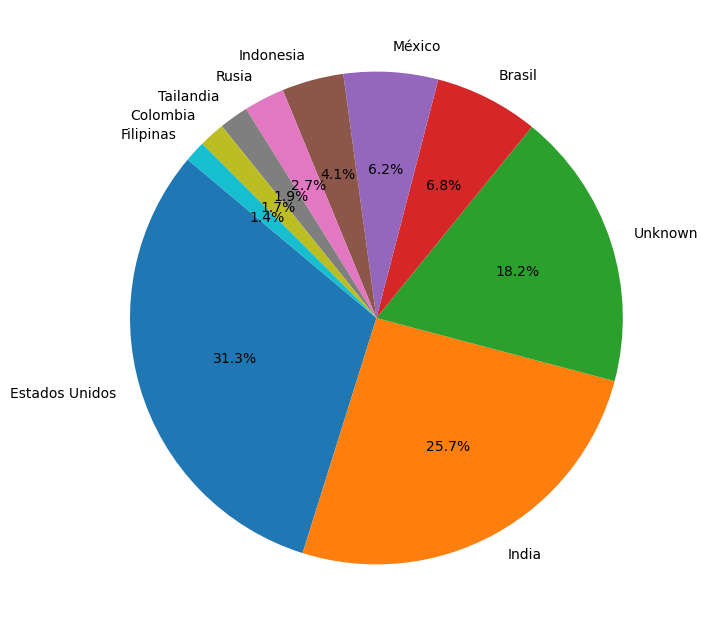

In [20]:
#Audience Analysis
top_countries=data['Country'].value_counts().head(10)#top 10 countries
plt.figure(figsize=(10,8))
plt.pie(top_countries,startangle=140,labels=top_countries.index,autopct='%1.1f%%')

TypeError: 'str' object is not callable

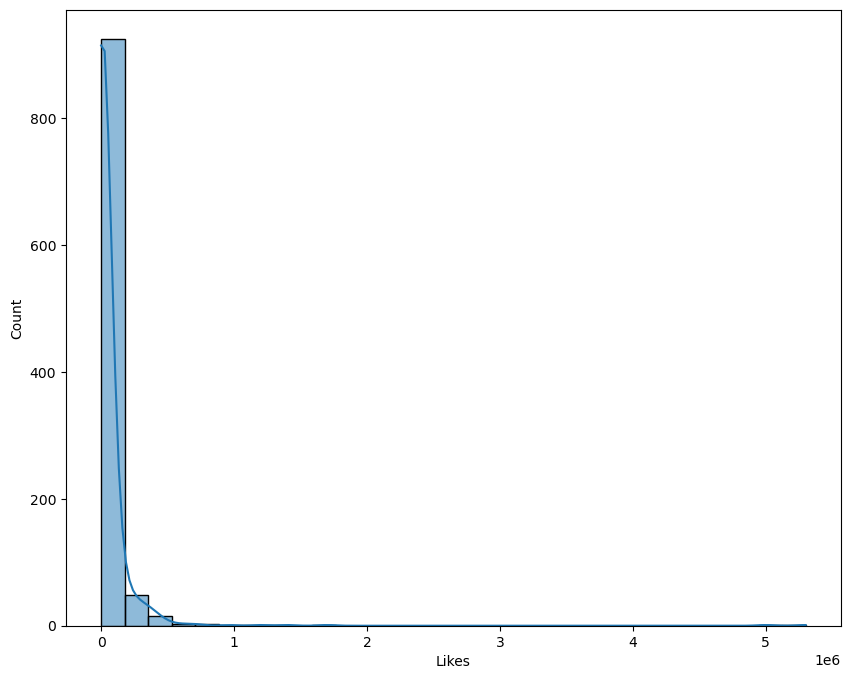

In [22]:
#distribution of likes
plt.figure(figsize=(10,8))
sns.histplot(data['Likes'],bins=30,kde=True)
plt.title('Distribution of likes across country')
plt.xlabel('Likes')
plt.show()

In [25]:
#performance metrics
corr_matrix=data.corr().abs()
corr_matrix

C:\Users\Tara\AppData\Local\Temp\ipykernel_4896\1754649650.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=data.corr().abs()


,Rank,Suscribers,Visits,Likes,Comments
Rank,1.000000,0.636552,0.102714,0.090913,0.049194
Suscribers,0.636552,1.000000,0.245203,0.211639,0.036350
Visits,0.102714,0.245203,1.000000,0.950470,0.324067
Likes,0.090913,0.211639,0.950470,1.000000,0.325911
Comments,0.049194,0.036350,0.324067,0.325911,1.000000


<Axes: >

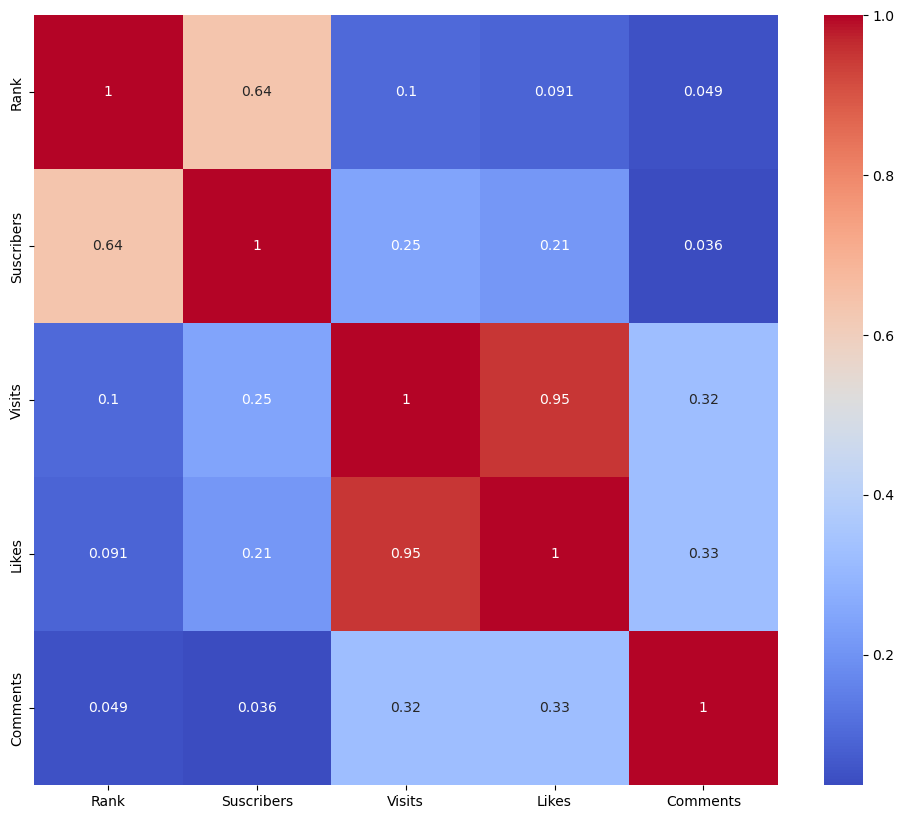

In [26]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')

TypeError: 'str' object is not callable

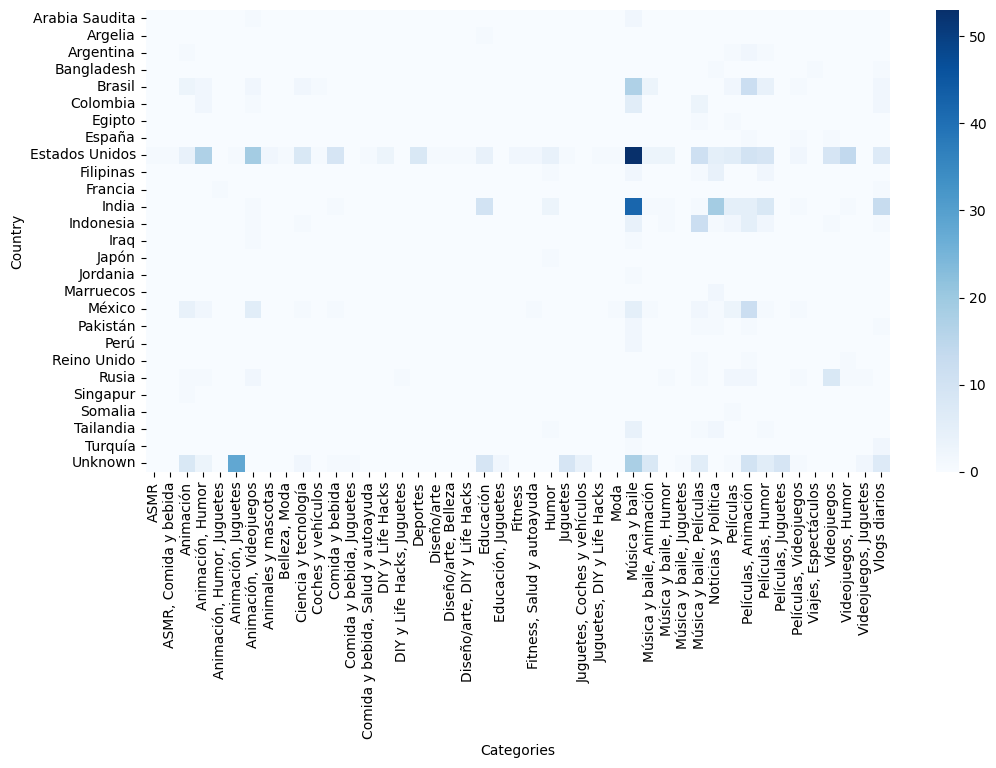

In [29]:
#Visualizing Regional Preferences
category_counts = data.groupby(['Country', 'Categories'])['Username'].count().unstack().fillna(0)
plt.figure(figsize=(12, 6)) 
sns.heatmap(category_counts, cmap="Blues") 
plt.title('Regional Preferences for Content Categories') 
plt.xlabel('Content Categories')
plt.ylabel('Country') 
plt.show()

TypeError: 'str' object is not callable

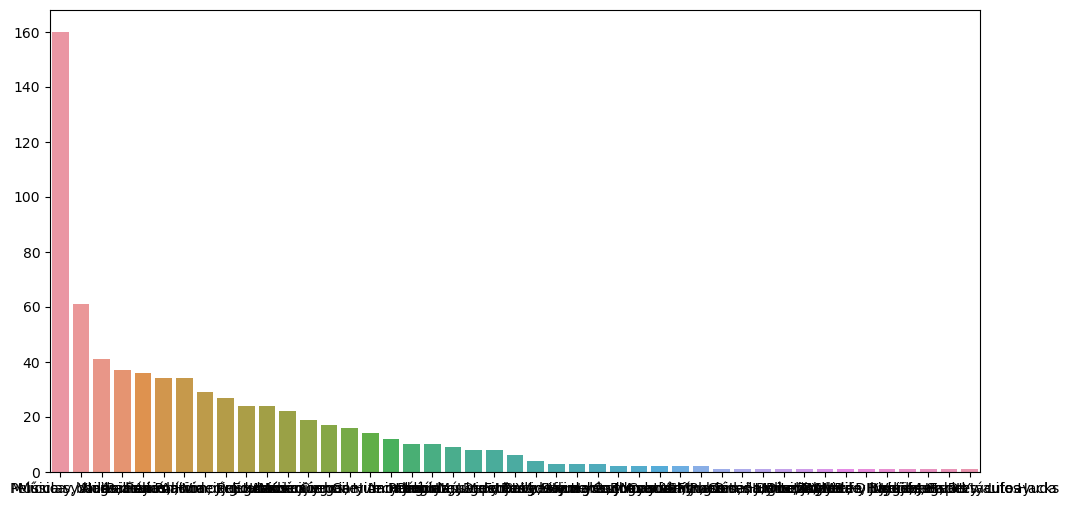

In [31]:

#Distribution of Content Categories: 
category_counts = data['Categories'].value_counts() 
plt.figure(figsize=(12, 6)) 
sns.barplot(x=category_counts.index, y=category_counts.values) 
plt.title('Distribution of Streamers by Content Categories')
plt.xlabel('Content Categories') 
plt.ylabel('Number of Streamers') 
plt.xticks(rotation=90) 
plt.show()


TypeError: 'str' object is not callable

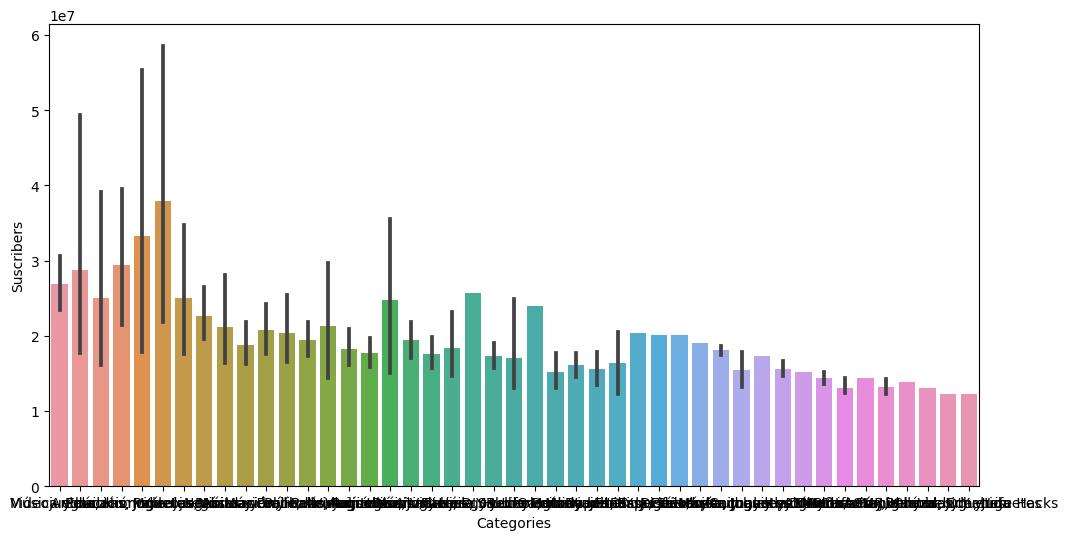

In [34]:
# Performance Metrics by Category
# Calculate and visualize average performance metrics by category
performance_metrics = ['Suscribers', 'Likes', 'Comments']

for metric in performance_metrics:
    plt.figure(figsize=(12, 6))
    sns.barplot(data=data, x='Categories', y=metric)
    plt.title(f'Average {metric.capitalize()} by Content Categories')
    plt.xlabel('Content Categories')
    plt.ylabel(f'Average {metric.capitalize()}')
    plt.xticks(rotation=90)
    plt.show()